# Data Analysis



In [15]:
!pip install ace-tools

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

amazon = pd.read_csv("https://raw.githubusercontent.com/amanzanares410/ds4002-project1/refs/heads/main/DATA/amazon_clothing_reviews.csv")
print(amazon.shape)
amazon.head()


(6525, 11)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


The data dimensions are 6525 x 11, so there are 6525 observations of 11
variables.



In [17]:
fashion_nova = pd.read_csv('https://raw.githubusercontent.com/amanzanares410/DS4002-Project1/refs/heads/main/DATA/fashionnova_reviews.csv')
print(fashion_nova.shape)
fashion_nova.head()

(131980, 9)


,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Champagne,/users/66c78240087b6269ffbcb5fb,US,1 review,2024-08-22T20:24:02.000Z,Rated 5 out of 5 stars,I love ordering from fashion nova,I love ordering from fashion nova. The clothes...,"August 22, 2024"
1,Vg customer,/users/6618fdb53d4198001210cbe7,VG,3 reviews,2024-08-21T05:43:11.000Z,Rated 5 out of 5 stars,Top tier content for fashion nova,Always amazing clothes and the fast shipping i...,"August 18, 2024"
2,Colleen Burgher,/users/64e9595206be1a001244ff73,US,3 reviews,2024-08-21T17:09:14.000Z,Rated 5 out of 5 stars,Prices and quality of products are…,Prices and quality of products are GREAT Would...,"August 21, 2024"
3,R.G.M,/users/66c58ad1c6ab36352a08f57a,US,1 review,2024-08-21T08:36:03.000Z,Rated 5 out of 5 stars,Great customer service,Great customer service. I was helped until the...,"August 20, 2024"
4,Rosalyn Cousar,/users/60ad4b6ef3788e001adbb8e3,US,5 reviews,2024-08-22T00:46:16.000Z,Rated 3 out of 5 stars,False advertising,Disappointing experience. You don’t live up to...,"August 21, 2024"


In [18]:
print(sum(amazon['Review Text'].isna()))
print(sum(amazon['Title'].isna()))
print(sum(amazon['Rating'].isna()))

print(sum(fashion_nova['Review Text'].isna()))
print(sum(fashion_nova['Review Title'].isna()))
print(sum(fashion_nova['Rating'].isna()))

229
1068
0
0
48
0


In [19]:
amazon = amazon.dropna(subset=['Review Text'])

rating_column = fashion_nova['Rating'].str.extract(r'Rated (\d) out of 5 stars').astype(int)
fashion_nova['Rating'] = rating_column

In [20]:
print(sum(amazon['Review Text'].isna()))
print(sum(fashion_nova['Review Text'].isna()))

0
0


In [21]:
df = pd.DataFrame()
df['Fashion Nova_shipping'] = fashion_nova['Review Text'].str.count(r'\bshipping\b')
df['Amazon_shipping'] = amazon['Review Text'].str.count(r'\bshipping\b')
df['Fashion Nova_quality'] = fashion_nova['Review Text'].str.count(r'\bquality\b')
df['Amazon_quality'] = amazon['Review Text'].str.count(r'\bquality\b')

In [22]:
# prompt: print count of each column in dataframe df

for column in df.columns:
  print(f"Counts for {column}:")
  print(df[column].value_counts())
  print("\n")


Counts for Fashion Nova_shipping:
Fashion Nova_shipping
0     124276
1       6466
2        921
3        215
4         56
5         27
6         10
7          5
8          2
10         1
9          1
Name: count, dtype: int64


Counts for Amazon_shipping:
Amazon_shipping
0.0    6282
1.0      14
Name: count, dtype: int64


Counts for Fashion Nova_quality:
Fashion Nova_quality
0    123654
1      8071
2       222
3        27
4         4
6         1
5         1
Name: count, dtype: int64


Counts for Amazon_quality:
Amazon_quality
0.0    5707
1.0     564
2.0      23
3.0       2
Name: count, dtype: int64




In [23]:
# Seperating by topic

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# Need to determine what stopwords we want to use
stop_words = set(stopwords.words('english'))
custom_stop_words = {}
stop_words.update(custom_stop_words)

# Preprocessing the data
def preprocess(text):
  tokens = word_tokenize(text.lower())
  tokens = [token for token in tokens if token.isalpha()]
  tokens = [token for token in tokens if token not in stop_words]
  return tokens

amazon['Processed_Reviews'] = amazon['Review Text'].apply(preprocess)
fashion_nova['Processed_Reviews'] = fashion_nova['Review Text'].apply(preprocess)


In [25]:
def categorize_review(text):
  shipping_keywords = ['shipping', 'delivery', 'shipment', 'deliver', 'time', 'packaging', 'box', 'late', 'early', 'fast', 'slow', 'arrived', 'delivered', 'received']
  quality_keywords = ['quality', 'fit', 'length', 'material', 'fabric', 'cheap', 'shape', 'style', 'clothing', 'made', 'size', 'thin']

  shipping = any(word in text for word in shipping_keywords)
  quality = any(word in text for word in quality_keywords)

  if shipping and quality:
    return 'Both'
  elif shipping:
    return 'Shipping'
  elif quality:
    return 'Quality'
  else:
    return 'Other'



amazon['Category'] = amazon['Processed_Reviews'].apply(categorize_review)
fashion_nova['Category'] = fashion_nova['Processed_Reviews'].apply(categorize_review)

In [26]:
# Category frequencies for Amazon
amazon_category_counts = amazon['Category'].value_counts()

# Category frequencies for Fashion Nova
fashion_nova_category_counts = fashion_nova['Category'].value_counts()

# Display counts
category_comparison = pd.DataFrame({
    'Amazon': amazon_category_counts,
    'Fashion Nova': fashion_nova_category_counts
}).fillna(0)


print(category_comparison)

          Amazon  Fashion Nova
Category                      
Both         481          6825
Other       1549         90651
Quality     4091         17017
Shipping     175         17487


In [27]:
# prompt: calculate the percentage of each category in category_comparison over the total

category_percentage = category_comparison.div(category_comparison.sum(axis=0), axis=1) * 100
print(category_percentage)


             Amazon  Fashion Nova
Category                         
Both       7.639771      5.171238
Other     24.602922     68.685407
Quality   64.977764     12.893620
Shipping   2.779543     13.249735


In [28]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [29]:
# Importing the VADER sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment from text
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)  # Returns a dictionary of sentiment scores
    compound = sentiment_score['compound']  # Get the compound score which represents overall sentiment
    if compound >= 0.05:
        return 'Good'   # Positive sentiment
    elif compound <= -0.05:
        return 'Bad'    # Negative sentiment
    else:
        return 'Neutral'  # Neutral sentiment

# Applying sentiment analysis to the original reviews (not the tokenized ones)
amazon['Sentiment'] = amazon['Review Text'].apply(get_sentiment)
fashion_nova['Sentiment'] = fashion_nova['Review Text'].apply(get_sentiment)

# Optionally, you can also apply it to the processed reviews
amazon['Processed_Sentiment'] = amazon['Processed_Reviews'].apply(lambda tokens: get_sentiment(' '.join(tokens)))
fashion_nova['Processed_Sentiment'] = fashion_nova['Processed_Reviews'].apply(lambda tokens: get_sentiment(' '.join(tokens)))


In [30]:
print(amazon[['Review Text', 'Sentiment', 'Category']].head())


                                         Review Text Sentiment  Category
0  Absolutely wonderful - silky and sexy and comf...      Good     Other
1  Love this dress!  it's sooo pretty.  i happene...      Good   Quality
2  I had such high hopes for this dress and reall...      Good   Quality
3  I love, love, love this jumpsuit. it's fun, fl...      Good  Shipping
4  This shirt is very flattering to all due to th...      Good   Quality


In [31]:
# Group by Category and Sentiment and count the occurrences
amazon_sentiment_counts = amazon.groupby(['Category', 'Sentiment']).size().reset_index(name='Count')
fashion_nova_sentiment_counts = fashion_nova.groupby(['Category', 'Sentiment']).size().reset_index(name='Count')

# Display the counts for Amazon
print("Amazon Review Sentiment Counts by Category:")
print(amazon_sentiment_counts)

# Display the counts for Fashion Nova
print("\nFashion Nova Review Sentiment Counts by Category:")
print(fashion_nova_sentiment_counts)


Amazon Review Sentiment Counts by Category:
    Category Sentiment  Count
0       Both       Bad     42
1       Both      Good    431
2       Both   Neutral      8
3      Other       Bad     91
4      Other      Good   1420
5      Other   Neutral     38
6    Quality       Bad    222
7    Quality      Good   3826
8    Quality   Neutral     43
9   Shipping       Bad     12
10  Shipping      Good    159
11  Shipping   Neutral      4

Fashion Nova Review Sentiment Counts by Category:
    Category Sentiment  Count
0       Both       Bad   1181
1       Both      Good   5385
2       Both   Neutral    259
3      Other       Bad   5152
4      Other      Good  41078
5      Other   Neutral  44421
6    Quality       Bad   1308
7    Quality      Good  14807
8    Quality   Neutral    902
9   Shipping       Bad   3968
10  Shipping      Good  11196
11  Shipping   Neutral   2323


In [32]:
# Calculate percentage of each sentiment within each category
def calculate_percentage(df):
    # Group by 'Category' and calculate total reviews in each category
    total_by_category = df.groupby('Category').size().reset_index(name='Total')

    # Group by 'Category' and 'Sentiment' and calculate counts for each sentiment
    sentiment_counts = df.groupby(['Category', 'Sentiment']).size().reset_index(name='Count')

    # Merge the total counts with sentiment counts
    merged = sentiment_counts.merge(total_by_category, on='Category')

    # Calculate the percentage of each sentiment within its category
    merged['Percentage'] = (merged['Count'] / merged['Total']) * 100

    return merged[['Category', 'Sentiment', 'Count', 'Total', 'Percentage']]

# Apply the function to both datasets
amazon_percentages = calculate_percentage(amazon)
fashion_nova_percentages = calculate_percentage(fashion_nova)

# Display the percentage results for Amazon
print("Amazon Review Sentiment Percentages by Category:")
print(amazon_percentages)

# Display the percentage results for Fashion Nova
print("\nFashion Nova Review Sentiment Percentages by Category:")
print(fashion_nova_percentages)


Amazon Review Sentiment Percentages by Category:
    Category Sentiment  Count  Total  Percentage
0       Both       Bad     42    481    8.731809
1       Both      Good    431    481   89.604990
2       Both   Neutral      8    481    1.663202
3      Other       Bad     91   1549    5.874758
4      Other      Good   1420   1549   91.672046
5      Other   Neutral     38   1549    2.453196
6    Quality       Bad    222   4091    5.426546
7    Quality      Good   3826   4091   93.522366
8    Quality   Neutral     43   4091    1.051088
9   Shipping       Bad     12    175    6.857143
10  Shipping      Good    159    175   90.857143
11  Shipping   Neutral      4    175    2.285714

Fashion Nova Review Sentiment Percentages by Category:
    Category Sentiment  Count  Total  Percentage
0       Both       Bad   1181   6825   17.304029
1       Both      Good   5385   6825   78.901099
2       Both   Neutral    259   6825    3.794872
3      Other       Bad   5152  90651    5.683335
4      Other 

<ipython-input-43-ea6e5fdcf648>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_percentages, x='Category', y='Percentage', hue='Sentiment', ci=None,


AttributeError: Rectangle.set() got an unexpected keyword argument 'col'

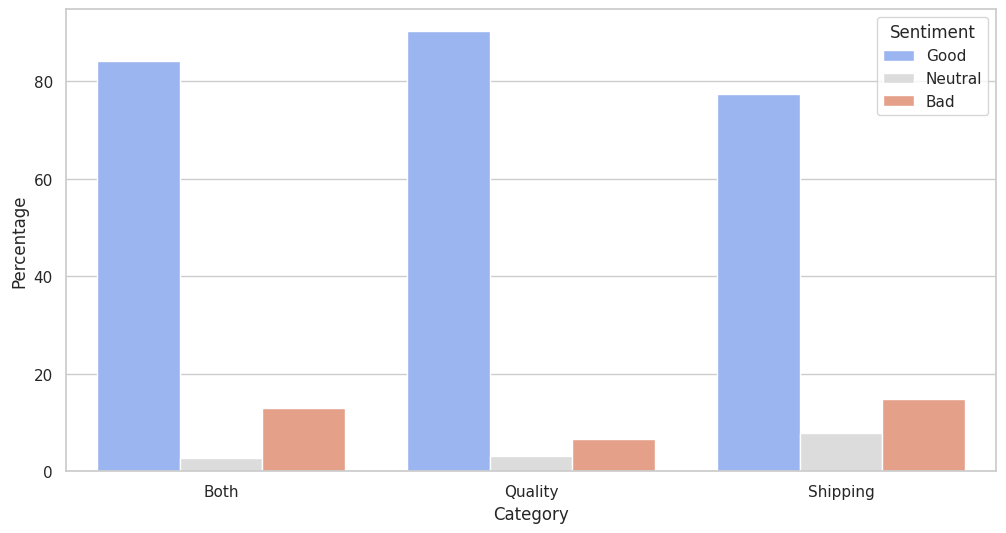

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column to distinguish between Amazon and Fashion Nova
amazon_percentages['Platform'] = 'Amazon'
fashion_nova_percentages['Platform'] = 'Fashion Nova'

# Combine both datasets with platform distinction
combined_percentages = pd.concat([amazon_percentages, fashion_nova_percentages], ignore_index=True, sort=False)
# Plotting the data using seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a bar plot with sentiment percentages for each category, separated by platform
sns.barplot(data=combined_percentages, x='Category', y='Percentage', hue='Sentiment', ci=None,
            palette='coolwarm', hue_order=['Good', 'Neutral', 'Bad'],
            dodge=True)

# Facet the plots by platform to make the distinction clear
g = sns.catplot(data=combined_percentages, x='Category', y='Percentage', hue='Sentiment',
                col='Platform', kind='bar', height=5, aspect=1, palette='coolwarm',
                hue_order=['Good', 'Neutral', 'Bad'])

# Add labels and title to the plot
g.set_axis_labels("Category", "Percentage")
g.set_titles("{col_name} Reviews")
g.fig.suptitle('Sentiment Distribution by Category for Amazon and Fashion Nova', y=1.03, fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-42-7f26360d57a9>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_percentages, x='Category', y='Percentage', hue='Platform',


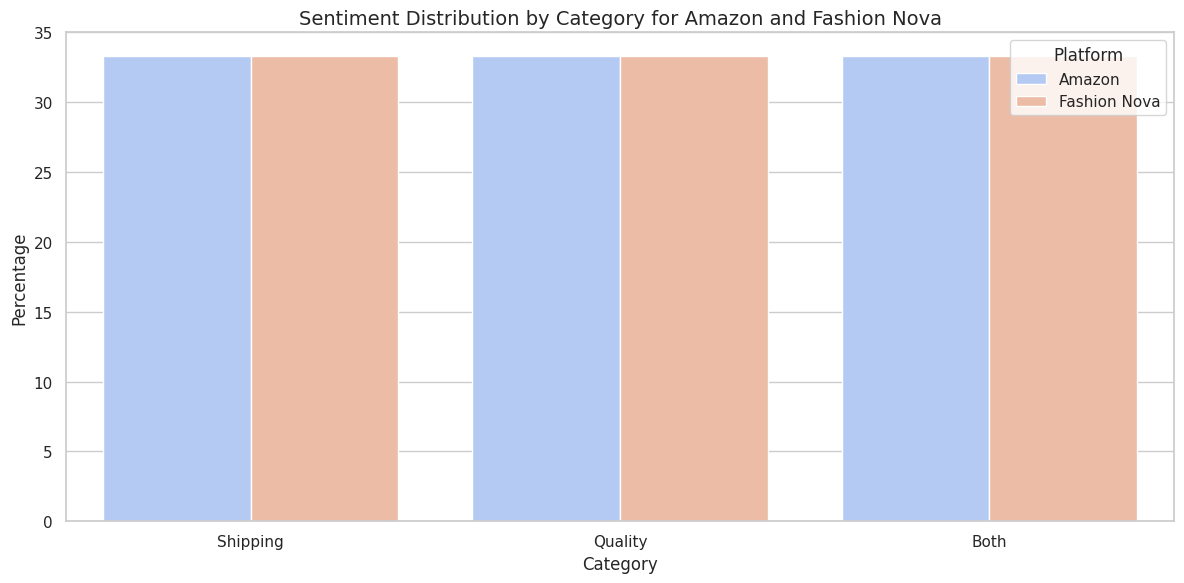

In [42]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a bar plot with sentiment percentages for each category, separated by platform
sns.barplot(data=combined_percentages, x='Category', y='Percentage', hue='Platform',
            ci=None, palette='coolwarm', dodge=True,
            hue_order=['Amazon', 'Fashion Nova'],
            order=['Shipping', 'Quality', 'Both'])

# Add labels and title
plt.title('Sentiment Distribution by Category for Amazon and Fashion Nova', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Show the legend and the plot
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


<ipython-input-44-e85c64d27077>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=category_df, x='Sentiment', y='Percentage', hue='Platform',


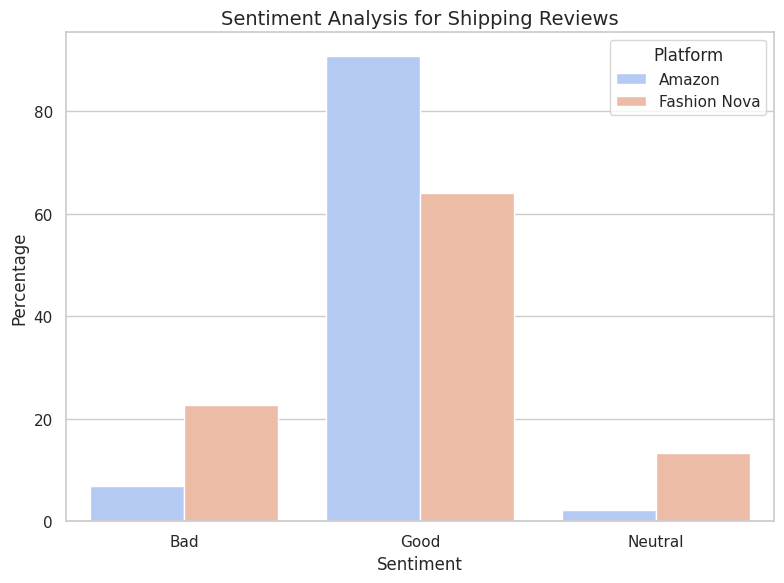

<ipython-input-44-e85c64d27077>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=category_df, x='Sentiment', y='Percentage', hue='Platform',


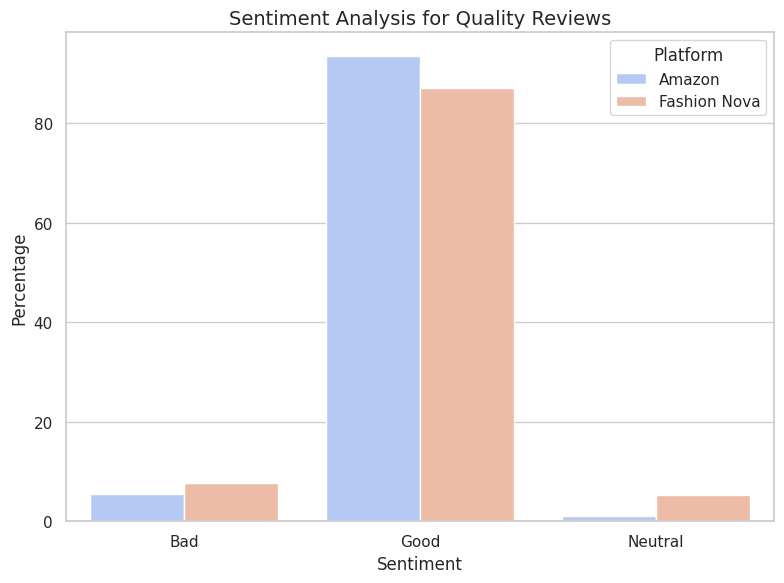

<ipython-input-44-e85c64d27077>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=category_df, x='Sentiment', y='Percentage', hue='Platform',


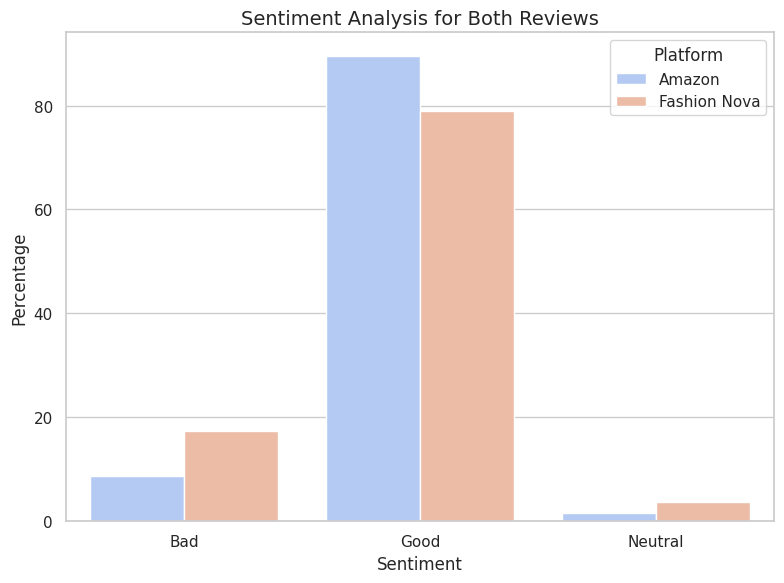

In [44]:
# Function to plot data for a specific category
def plot_category(category, df):
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")

    # Filter the DataFrame for the specific category
    category_df = df[df['Category'] == category]

    # Create a bar plot for the category
    sns.barplot(data=category_df, x='Sentiment', y='Percentage', hue='Platform',
                ci=None, palette='coolwarm', dodge=True, hue_order=['Amazon', 'Fashion Nova'])

    # Add labels and title
    plt.title(f'Sentiment Analysis for {category} Reviews', fontsize=14)
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.legend(title='Platform')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Plot for Shipping category
plot_category('Shipping', combined_percentages)

# Plot for Quality category
plot_category('Quality', combined_percentages)

# Plot for Both category
plot_category('Both', combined_percentages)
